In [1]:
# import packages
import tweepy # twitter API
import pandas as pd 
import numpy as np

# visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Edit the USERNAME before running the script
USERNAME = 'macwinux'

# Import the Keys and Secret
from passes import *

# API setup
def twitter_set():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [3]:
# We create an extractor object to extract the tweets:
extractor = twitter_set()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name=USERNAME, count=1000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

@creingalain GG https://t.co/h5Fszgi6cg

This set is making me want to play Standard again. 😁😁😁 https://t.co/V1jCgGk6V4

RT @mosesbread72: Equality. https://t.co/NQ4pJt94AZ

On this week's We Never Learn: Yooooo! Ogata pls

@samstod It's back! Finally! Doom Blade and 4-mana wraths next please? 🙏🙏🙏



In [4]:
# Create a pandas data frame
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))


,Tweets
0,@creingalain GG https://t.co/h5Fszgi6cg
1,This set is making me want to play Standard ag...
2,RT @mosesbread72: Equality. https://t.co/NQ4pJ...
3,On this week's We Never Learn: Yooooo! Ogata pls
4,@samstod It's back! Finally! Doom Blade and 4-...
5,I always find myself scratching my head on why...
6,D: https://t.co/kQf20ctD09
7,"Ugh, I have like 0 energy today. So tired... 😔😔😔"
8,Put this in the Blizzard Store pls https://t.c...
9,"This week's Weekly Shonen Jump came out, which..."


In [5]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [6]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [7]:
data.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,@creingalain GG https://t.co/h5Fszgi6cg,39,907317029085917184,2017-09-11 18:56:51,Twitter for Android,0,0
1,This set is making me want to play Standard ag...,78,905812387285962753,2017-09-07 15:17:56,Twitter Web Client,0,0
2,RT @mosesbread72: Equality. https://t.co/NQ4pJ...,51,905717593394225152,2017-09-07 09:01:16,Twitter for Android,0,235829
3,On this week's We Never Learn: Yooooo! Ogata pls,48,904792149509554176,2017-09-04 19:43:53,Twitter for Android,1,0
4,@samstod It's back! Finally! Doom Blade and 4-...,74,904770983067770880,2017-09-04 18:19:46,Twitter Web Client,1,0


In [8]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 87.645


In [9]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
On this week's We Never Learn: Yooooo! Ogata pls
Number of likes: 1
48 characters.

The tweet with more retweets is: 
RT @mosesbread72: Equality. https://t.co/NQ4pJt94AZ
Number of retweets: 235829
51 characters.



In [10]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

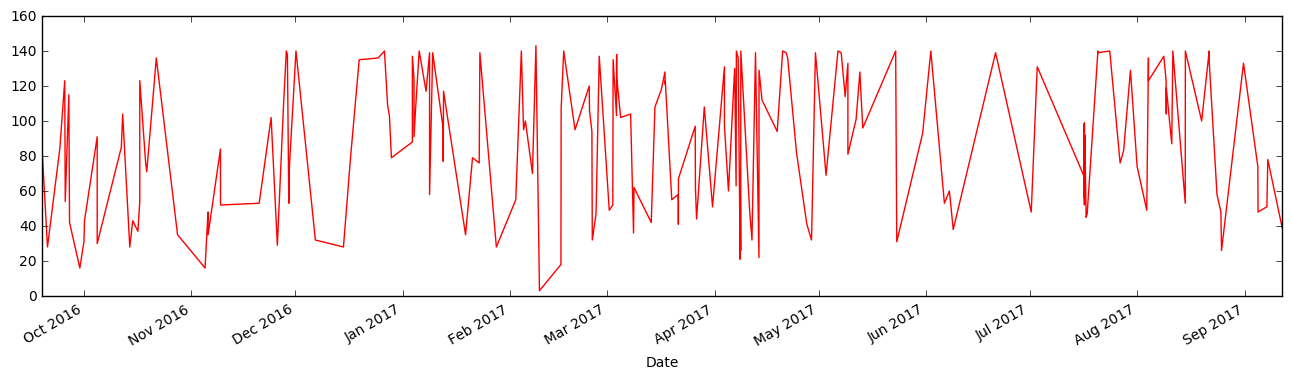

In [11]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

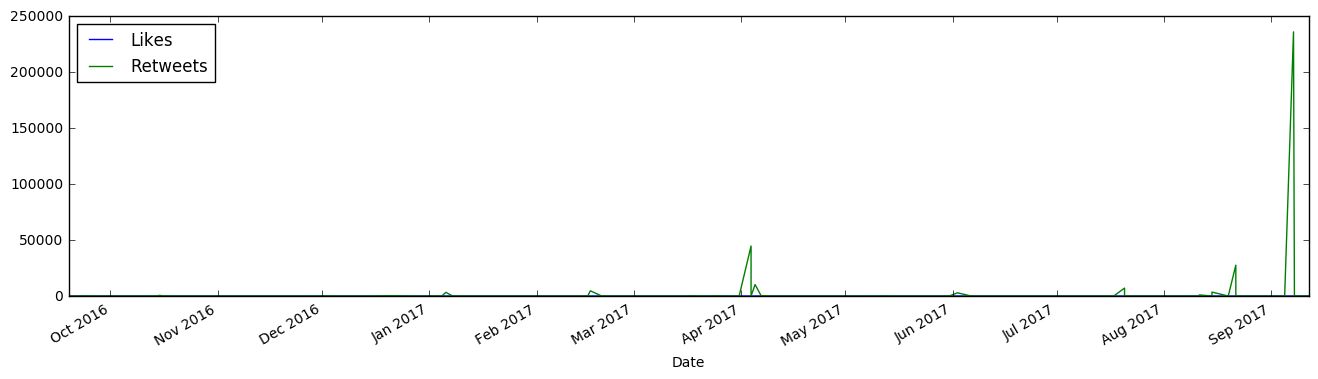

In [12]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [13]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Web Client


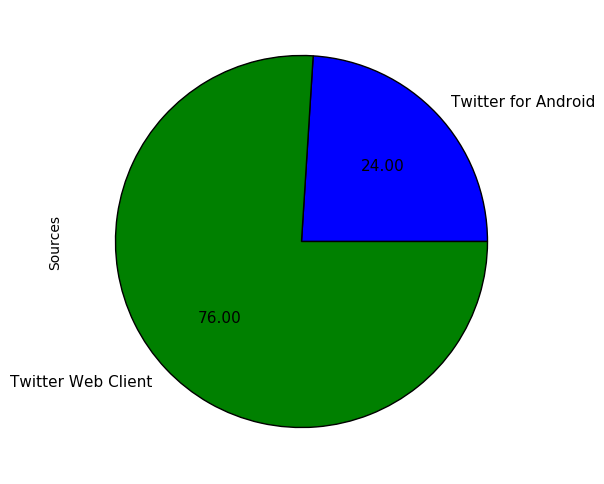

In [14]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [15]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [16]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@creingalain GG https://t.co/h5Fszgi6cg,39,907317029085917184,2017-09-11 18:56:51,Twitter for Android,0,0,0
1,This set is making me want to play Standard ag...,78,905812387285962753,2017-09-07 15:17:56,Twitter Web Client,0,0,0
2,RT @mosesbread72: Equality. https://t.co/NQ4pJ...,51,905717593394225152,2017-09-07 09:01:16,Twitter for Android,0,235829,0
3,On this week's We Never Learn: Yooooo! Ogata pls,48,904792149509554176,2017-09-04 19:43:53,Twitter for Android,1,0,0
4,@samstod It's back! Finally! Doom Blade and 4-...,74,904770983067770880,2017-09-04 18:19:46,Twitter Web Client,1,0,0
5,I always find myself scratching my head on why...,133,903271762699329536,2017-08-31 15:02:24,Twitter Web Client,0,0,-1
6,D: https://t.co/kQf20ctD09,26,900974192677539840,2017-08-25 06:52:41,Twitter for Android,0,0,0
7,"Ugh, I have like 0 energy today. So tired... 😔😔😔",48,900907277896474624,2017-08-25 02:26:47,Twitter for Android,0,0,-1
8,Put this in the Blizzard Store pls https://t.c...,58,900499890307866624,2017-08-23 23:27:58,Twitter Web Client,0,0,0
9,"This week's Weekly Shonen Jump came out, which...",134,899686214978084869,2017-08-21 17:34:43,Twitter Web Client,0,0,1


In [17]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [18]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 42.5%
Percentage of neutral tweets: 35.5%
Percentage of negative tweets: 22.0%


In [19]:
for x in np.arange(len(neg_tweets)):
    print(neg_tweets[x])

I always find myself scratching my head on why there's such a massive hate of phone bezels. Am I that out of touch with current tech?
Ugh, I have like 0 energy today. So tired... 😔😔😔
Hmm, looks like the memory leak is not caused by Chrome, but by a driver due to the W10 Creators Update.
Ugh, can't login to PSN once again. Blanket banning IP addresses + DHCP = this crap. The laziest of solutions to protect your network. 😡
I like generic LN crap but holy shit Akashic Records is just pure garbage.
UMvC3 is one of the few games that makes me so hype so I'm going to be so sad that it will go away.
I forgot how scummy FedEx is, it's been a long time since I've used them. I have to remember to stick with EMS or other couriers next time.
Man, fuck FedEx. US$11 for shipping, understandable. But another $11 for "storage fees"? Highway robbery. Customs didn't even charge me WTF.
RT @TwitchSupport: 🔎 We are actively investigating reports of users being unable to load streams. ^DM
This just makes m